In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
df = sns.load_dataset("penguins")

In [2]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
#결측치 확인
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [4]:
# 결측치가 있는 행 출력
df[df.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


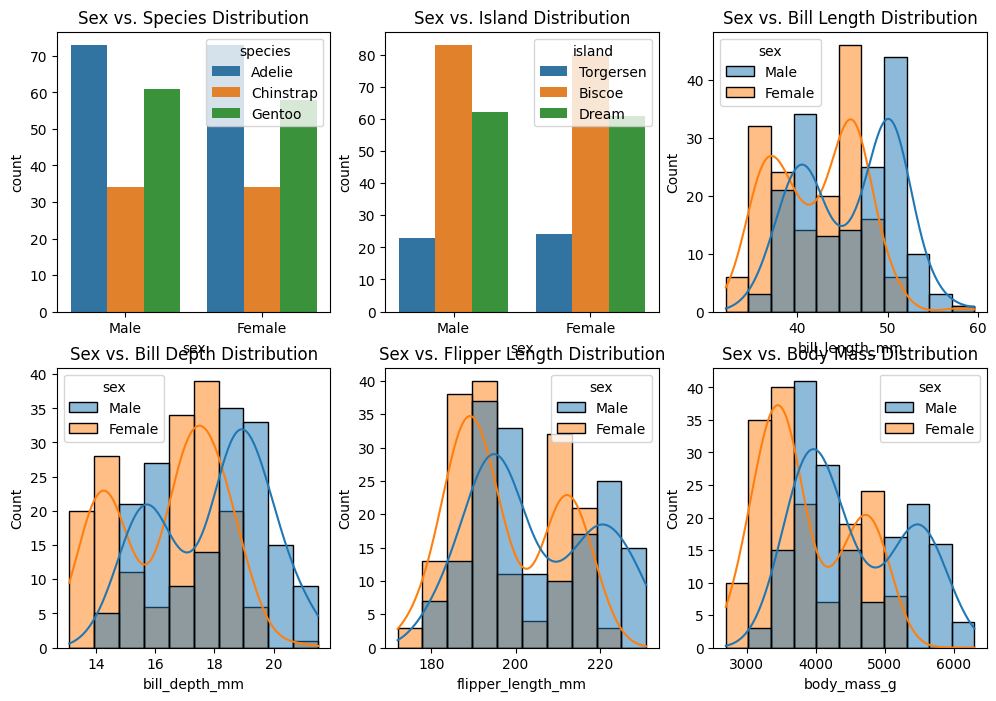

In [5]:
import matplotlib.pyplot as plt

# 시각화를 위한 그래프 크기 설정
plt.figure(figsize=(12, 8))

# "sex"에 따른 "species" 분포 시각화
plt.subplot(231) # 2x3 그리드의 첫 번째 위치
sns.countplot(data=df, x="sex", hue="species")
plt.title("Sex vs. Species Distribution")

# "sex"에 따른 "island" 분포 시각화
plt.subplot(232)
sns.countplot(data=df, x="sex", hue="island")
plt.title("Sex vs. Island Distribution")

# "sex"에 따른 "bill_length_mm" 분포 시각화
plt.subplot(233)
sns.histplot(data=df, x="bill_length_mm", hue="sex", kde=True)
plt.title("Sex vs. Bill Length Distribution")

# "sex"에 따른 "bill_depth_mm" 분포 시각화
plt.subplot(234)
sns.histplot(data=df, x="bill_depth_mm", hue="sex", kde=True)
plt.title("Sex vs. Bill Depth Distribution")

# "sex"에 따른 "flipper_length_mm" 분포 시각화
plt.subplot(235)
sns.histplot(data=df, x="flipper_length_mm", hue="sex", kde=True)
plt.title("Sex vs. Flipper Length Distribution")

# "sex"에 따른 "body_mass_g" 분포 시각화
plt.subplot(236)
sns.histplot(data=df, x="body_mass_g", hue="sex", kde=True)
plt.title("Sex vs. Body Mass Distribution")

# 그래프 표시
plt.show()

# 결측치 해결 과정
행 번호 3번과 339번 데이터는 species와 island 열을 제외하면 모든 열의 데이터가 NaN이기에 행 자체를 제거하는 것이 좋겠다고 판단했다.  
나머지 행의 결측치는 성별(sex) 데이터에만 존재했는데, 성별 데이터와 다른 열의 데이터를 분석하여 유의미한 관련성이 있다면 관련된 열의 데이터를 기준으로 성별 데이터 결측치를 대체할 계획을 수립했다.  
그러나, 성별에 따른 species와 island는 관련성이 없었고, 나머지 열의 경우 성별이 남자일수록 그래프가 오른쪽으로 이동하는(값이 더 커지는) 경향성을 보이긴 했지만, 이 분석결과만으로는 결측치를 해결할 수 없었다.  
예를 들어 body_mass_g가 4875.0인 경우, 성별을 female로 설정하면 female 치곤 무거운 펭귄이지만 충분히 존재할 수 있는 펭귄이고, 성별을 male로 설정해도 male 치곤 가벼운 펭귄이지만 충분히 존재할 수 있는 펭귄이기 때문이다.  
따라서 성별을 특정한 값으로 대체하는 것 대신 결측치와 관련된 행들을 삭제하는 방법을 검토했다.  
결측치가 있는 행의 비율은 전체 데이터의 약 3.19%에 불과하기 때문에 결측치가 있는 행의 삭제로 인해 발생하는 데이터 손실 문제가 크지 않다고 판단했다.  
따라서 결측치가 있는 행들을 삭제하는 방식을 선택했다.

In [6]:
df.dropna(inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [7]:
print(df.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [8]:
# Converting categorical data
sex = pd.get_dummies(df['sex'],drop_first=True)
island = pd.get_dummies(df['island'],drop_first=True)

In [9]:
new_data = pd.concat([df,island,sex], axis=1)
new_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen,Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,1,1
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0,0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0,0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0,0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0,0,0


In [10]:
species_names = new_data['species'].unique()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
y = new_data.species
y = y.map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
new_data.drop(['species', 'island', 'sex'],inplace=True,axis=1)
X = new_data[['bill_length_mm', 'bill_depth_mm']].values
X_hat = new_data # accuracy 측정 위해 생성

# n_neighbors = 6

weights='uniform'

Accuracy (weights='uniform'): 0.7910447761194029

confusion matrix (weights='uniform')


[[27  1  3]
 [ 9  4  0]
 [ 1  0 22]]
KNN (weights='uniform') 분류 보고서
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        31
           1       0.80      0.31      0.44        13
           2       0.88      0.96      0.92        23

    accuracy                           0.79        67
   macro avg       0.80      0.71      0.72        67
weighted avg       0.79      0.79      0.77        67

weights='distance'

Accuracy (weights='distance'): 0.8208955223880597

confusion matrix (weights='distance')


[[25  2  4]
 [ 5  8  0]
 [ 0  1 22]]
KNN (weights='distance') 분류 보고서
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.73      0.62      0.67        13
           2       0.85      0.96      0.90        23

    accuracy                           0.82  

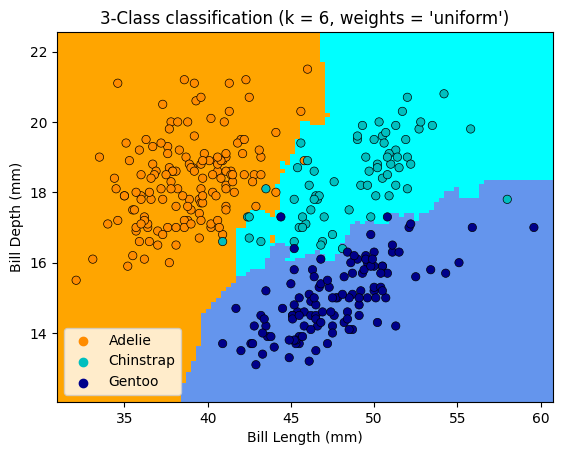

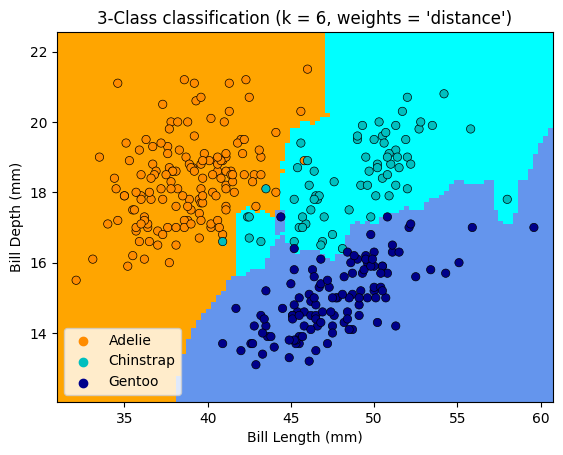

In [12]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

n_neighbors = 6

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_hat, y, test_size=0.2, random_state=42)

for weights in ["uniform", "distance"]:
    print("="*52)
    knn = KNeighborsClassifier(n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
    print(f"weights='{weights}'\n")
    # 테스트 데이터로 예측
    y_pred = knn.predict(X_test)

    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy (weights='{weights}'): {accuracy}\n")

    # confusion matrix
    print(f"confusion matrix (weights='{weights}')\n\n")
    print(confusion_matrix(y_test,y_pred))

    # 분류 보고서 출력
    print(f"KNN (weights='{weights}') 분류 보고서")
    print(classification_report(y_test, y_pred))

    # knn 시각화
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="Bill Length (mm)",
        ylabel="Bill Depth (mm)",
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=species_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

# n_neighbors = 25

weights='uniform'

Accuracy (weights='uniform'): 0.7910447761194029

confusion matrix (weights='uniform')


[[30  0  1]
 [12  1  0]
 [ 1  0 22]]
KNN (weights='uniform') 분류 보고서
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        31
           1       1.00      0.08      0.14        13
           2       0.96      0.96      0.96        23

    accuracy                           0.79        67
   macro avg       0.88      0.67      0.64        67
weighted avg       0.85      0.79      0.73        67

weights='distance'

Accuracy (weights='distance'): 0.8208955223880597

confusion matrix (weights='distance')


[[27  1  3]
 [ 7  6  0]
 [ 1  0 22]]
KNN (weights='distance') 분류 보고서
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        31
           1       0.86      0.46      0.60        13
           2       0.88      0.96      0.92        23

    accuracy                           0.82  

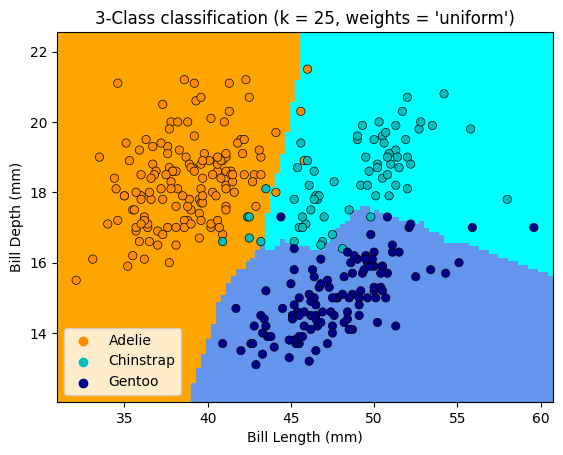

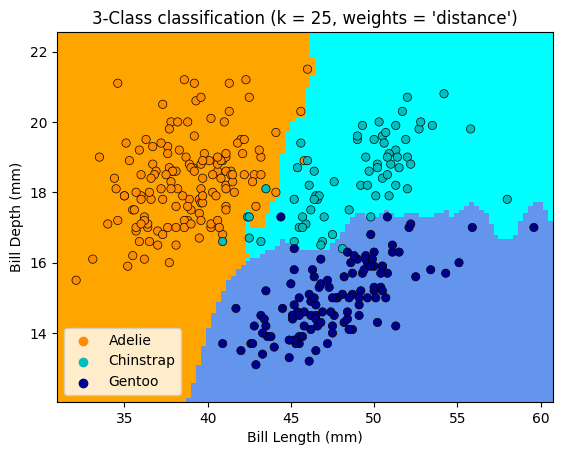

In [13]:
n_neighbors = 25

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_hat, y, test_size=0.2, random_state=42)

for weights in ["uniform", "distance"]:
    print("="*52)
    knn = KNeighborsClassifier(n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
    print(f"weights='{weights}'\n")
    # 테스트 데이터로 예측
    y_pred = knn.predict(X_test)

    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy (weights='{weights}'): {accuracy}\n")

    # confusion matrix
    print(f"confusion matrix (weights='{weights}')\n\n")
    print(confusion_matrix(y_test,y_pred))

    # 분류 보고서 출력
    print(f"KNN (weights='{weights}') 분류 보고서")
    print(classification_report(y_test, y_pred))

    # knn 시각화
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="Bill Length (mm)",
        ylabel="Bill Depth (mm)",
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=species_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()